In [ ]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [7]:
def load_df(filename):
    return pd.read_csv(filename, index_col=0)
    
pfp = '/home/ngr/ushare/covid_ed/results/'
dfp = '/home/ngr/ushare/covid_ed/data/'
fname = 'imputed_output_20.csv'

df = load_df(os.path.join(dfp,fname))
df = df.dropna()

In [11]:
# params
var_names = 'Covariate'
df[var_names]=df.index
# dev
# df[var_names]=[(i[0].upper()+i[1:].lower()).replace('_',' ') if 'cc' not in i else i.replace('cc_','')[0].upper()+i.replace('cc_','')[1:] for i in df.index]
# capitalize = ['bp','hr','rr','wbc','bun','chf','dm'] # keep these lowercase 
# df[var_names] = [i.upper() if i.lower() in capitalize else i for i in df[var_names]] 
df[var_names]=['    {}'.format(i) for i in df[var_names]]
if 'intercept' in df[var_names][0].lower():
    df = df.iloc[1:,:]
categories_covariates = []
# hard code breaks
for i in df[var_names]:
    if 'blood pressure' in i.lower():
        categories_covariates.append('Labs & vitals')
        categories_covariates.append(i)
    elif i=='    AIDS':
        categories_covariates.append('Comorbidities')
        categories_covariates.append(i.upper())
    elif '    Age'==i:
        categories_covariates.append('Demographics')
        categories_covariates.append(i)
    else: 
        categories_covariates.append(i)
        
df_cat = pd.DataFrame({var_names:categories_covariates,
                       'y':list(reversed(range(len(categories_covariates))))})
df_cat = pd.merge(df_cat,df,left_on=var_names,right_on=var_names, how='outer')

print('Here are the category interval idxs (for creating rect):')
print('    {}'.format([df_cat['y'][i] for i,v in enumerate(df_cat[var_names]) if '    ' not in v]))


Here are the category interval idxs (for creating rect):
    [65, 37, 6]


/home/ngr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ngr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
for i in df_cat[var_names]:
    print(i)

Labs & vitals
    Systolic blood pressure
    Heart rate
    Respiratory rate
    Pulse oximetry
    Temperature
    C-reactive protein
    D-dimer
    Ferritin
    Hemoglobin
    Platelets
    Procalcitonin
    Troponin I
    White Blood Cell Count
    Alkaline  phosphatase
    Alanine transferase
    Aspartate transferase
    Bicarbonate
    BUN
    Calcium
    Chloride
    Creatinine
    Glucose
    Lactate
    Potassium
    Sodium
    Total bilirubin
    Total protein
Comorbidities
    AIDS
    Alcohol abuse
    Deficiency anemias
    Rheumatoid arithitis and collagen vascular
    Anemia from blood loss
    Congestive heart failure
    Chronic pulmonary disease
    Coagulation Disorder
    Depression
    Diabetes without complications
    Diabetes with complications
    Drug abuse
    Hypertension without complications
    Hypertension with complications
    Hypothyroidism
    Liver disease
    Lymphoma
    Fluid and Electrolyte Disorders
    Metastatic disease
    Other Neurologic

In [13]:
df_cat['sig']=False
for i,v in enumerate(df_cat['Covariate']):
    if not np.isnan(df_cat.loc[i,'odds']):
        if df_cat.loc[i,'odds'] <= 1 and df_cat.loc[i,'upper_ci'] <= 1:
            df_cat.loc[i,'sig']=True
        elif df_cat.loc[i,'odds'] >= 1 and df_cat.loc[i,'lower_ci'] >= 1:
            df_cat.loc[i,'sig']=True
df_cat['sig_color']=["r" if i else 'k' for i in df_cat['sig']]

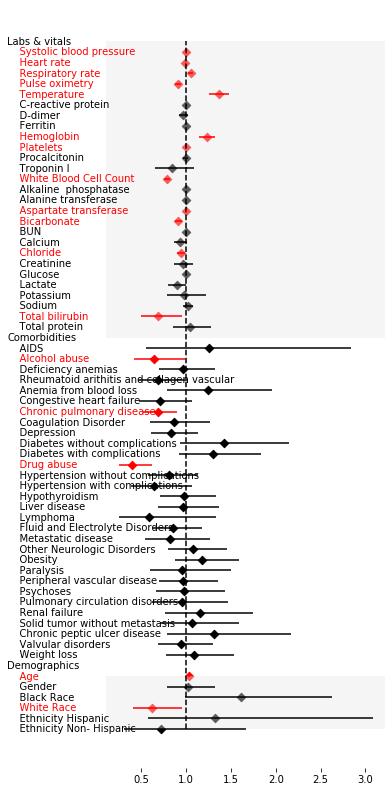

In [14]:
# plot
fig,ax = plt.subplots(1,1,figsize=(5,14))
if True:
    ax.vlines(1,df_cat['y'].min(),df_cat['y'].max(), linestyle='--')
for i,v in enumerate(df_cat[var_names]):
    ax.scatter(df_cat.loc[i,'odds'],df_cat.loc[i,'y'],
               color=df_cat.loc[i,'sig_color'],marker='D',alpha=1)
for i,v in enumerate(df_cat[var_names]):
    ax.hlines(df_cat.loc[i,'y'], df_cat.loc[i,'lower_ci'], 
              df_cat.loc[i,'upper_ci'], color = df_cat.loc[i,'sig_color'])
if False:
    ax.set_xscale('log')
ax.axes.get_yaxis().set_visible(False)
ax.get_xaxis().tick_bottom()
ax.set_frame_on(False)
xmin, xmax = ax.get_xaxis().get_view_interval()
for i in range(df_cat.shape[0]):
    ax.text(-1, df_cat.loc[i,'y'], df_cat.loc[i,var_names],
            color = df_cat.loc[i,'sig_color'],ha="left", va="center")
xmin, xmax = ax.get_xaxis().get_view_interval()
plt.gca().add_patch(mpl.patches.Rectangle(xy=(xmin,0), width=(xmax-xmin), height=5, 
                                         facecolor='#E8E8E8', alpha=0.4))
plt.gca().add_patch(mpl.patches.Rectangle(xy=(xmin,37), width=(xmax-xmin), height=28, 
                                         facecolor='#E8E8E8', alpha=0.4))
if False :
    # add grid lines
    ax.grid(True, which='minor', axis='x', color='gray')
    ax.grid(True, which='major', axis='x', color='k', linestyle='--', lw=2)
    

if True:
    fig.savefig(os.path.join(pfp,'fplot.pdf'),bbox_inches='tight')


In [15]:
df_lab = df_cat.loc[0:27,:]
df_lab.index = list(range(df_lab.shape[0]))
dft = df_cat.iloc[0:-1,:]
dft.index = list(range(dft.shape[0]))
df_ccdemo = dft.loc[59:,:]
df_ccdemo = df_ccdemo.append(dft.loc[28:58,:])
df_ccdemo.index = list(range(df_ccdemo.shape[0]))
df_ccdemo['y'] = list(reversed(range(df_ccdemo.shape[0])))


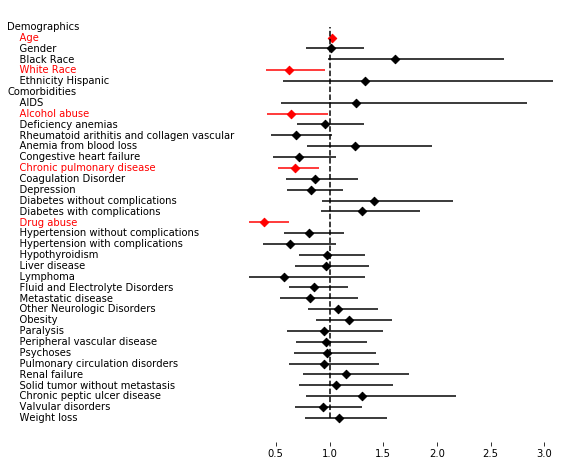

In [16]:
# plot
fig,ax = plt.subplots(1,1,figsize=(6,8))
if True:
    ax.vlines(1,df_ccdemo['y'].min(),df_ccdemo['y'].max(), linestyle='--')
for i,v in enumerate(df_ccdemo[var_names]):
    ax.scatter(df_ccdemo.loc[i,'odds'],df_ccdemo.loc[i,'y'],
               color=df_ccdemo.loc[i,'sig_color'],marker='D',alpha=1)
for i,v in enumerate(df_ccdemo[var_names]):
    ax.hlines(df_ccdemo.loc[i,'y'], df_ccdemo.loc[i,'lower_ci'], 
              df_ccdemo.loc[i,'upper_ci'], color = df_ccdemo.loc[i,'sig_color'])
if False:
    ax.set_xscale('log')
ax.axes.get_yaxis().set_visible(False)
ax.get_xaxis().tick_bottom()
ax.set_frame_on(False)
xmin, xmax = ax.get_xaxis().get_view_interval()
for i in range(df_ccdemo.shape[0]):
    ax.text(-2, df_ccdemo.loc[i,'y'], df_ccdemo.loc[i,var_names],
            color = df_ccdemo.loc[i,'sig_color'],ha="left", va="center")
xmin, xmax = ax.get_xaxis().get_view_interval()
# plt.gca().add_patch(mpl.patches.Rectangle(xy=(xmin,df_ccdemo['y'].max()-6), width=(xmax-xmin), height=6, 
#                                          facecolor='#E8E8E8', alpha=0.4))
# plt.gca().add_patch(mpl.patches.Rectangle(xy=(xmin,37), width=(xmax-xmin), height=28, 
#                                          facecolor='#E8E8E8', alpha=0.4))
if False :
    # add grid lines
    ax.grid(True, which='minor', axis='x', color='gray')
    ax.grid(True, which='major', axis='x', color='k', linestyle='--', lw=2)
    

if True:
    fig.savefig(os.path.join(pfp,'fplot_ccdemo.pdf'),bbox_inches='tight')


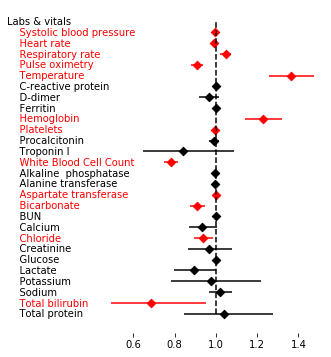

In [17]:
# plot
fig,ax = plt.subplots(1,1,figsize=(4,6))
if True:
    ax.vlines(1,df_lab['y'].min(),df_lab['y'].max(), linestyle='--')
for i,v in enumerate(df_lab[var_names]):
    ax.scatter(df_lab.loc[i,'odds'],df_lab.loc[i,'y'],
               color=df_lab.loc[i,'sig_color'],marker='D',alpha=1)
for i,v in enumerate(df_lab[var_names]):
    ax.hlines(df_lab.loc[i,'y'], df_lab.loc[i,'lower_ci'], 
              df_lab.loc[i,'upper_ci'], color = df_lab.loc[i,'sig_color'])
if False:
    ax.set_xscale('log')
ax.axes.get_yaxis().set_visible(False)
ax.get_xaxis().tick_bottom()
ax.set_frame_on(False)
xmin, xmax = ax.get_xaxis().get_view_interval()
for i in range(df_lab.shape[0]):
    ax.text(-0.01, df_lab.loc[i,'y'], df_lab.loc[i,var_names],
            color = df_lab.loc[i,'sig_color'],ha="left", va="center")
xmin, xmax = ax.get_xaxis().get_view_interval()
# plt.gca().add_patch(mpl.patches.Rectangle(xy=(xmin,0), width=(xmax-xmin), height=5, 
#                                          facecolor='#E8E8E8', alpha=0.4))
# plt.gca().add_patch(mpl.patches.Rectangle(xy=(xmin,37), width=(xmax-xmin), height=28, 
#                                          facecolor='#E8E8E8', alpha=0.4))
if False :
    # add grid lines
    ax.grid(True, which='minor', axis='x', color='gray')
    ax.grid(True, which='major', axis='x', color='k', linestyle='--', lw=2)
    

if True:
    fig.savefig(os.path.join(pfp,'fplot_lab.pdf'),bbox_inches='tight')
